## Preprocessing

In [9]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import pandas as pd 

In [10]:
#  Import and read the charity_data.csv.
application_df = pd.read_csv("Resources/charity_data.csv")

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

# Choose a cutoff value and create a list of application types to be replaced
# Assign values counts to a variable to create bins. 
application_counts = application_df['APPLICATION_TYPE'].value_counts()

# gather all the application types that will be binned into "Other"
application_types_to_replace = list(application_counts[application_counts<500].index)

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classification_counts = application_df['CLASSIFICATION'].value_counts()
classifications_to_replace = list(classification_counts[classification_counts<1000].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")


In [17]:
# Convert categorical data to numeric with `pd.get_dummies`
application_dummy_df = pd.get_dummies(application_df)
application_dummy_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [12]:
# Split our preprocessed data into our features and target arrays
X = application_dummy_df.drop("IS_SUCCESSFUL", axis=1).values
y = application_dummy_df["IS_SUCCESSFUL"].values

#split test and train data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state=42)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Compile, Train and Evaluate the Model

In [13]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=80, activation="relu", input_dim=43))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=30, activation="relu"))

# third hidden layer
nn.add(tf.keras.layers.Dense(units=10, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 80)                3520      
                                                                 
 dense_5 (Dense)             (None, 30)                2430      
                                                                 
 dense_6 (Dense)             (None, 10)                310       
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model - Adding a validation split to see if it will improve the model. 
fit_model = nn.fit(X_train_scaled, y_train, epochs=80)

Epoch 1/80
858/858 [==============================] - 1s 937us/step - loss: 0.5664 - accuracy: 0.7240
Epoch 2/80
858/858 [==============================] - 1s 942us/step - loss: 0.5526 - accuracy: 0.7296
Epoch 3/80
858/858 [==============================] - 1s 954us/step - loss: 0.5512 - accuracy: 0.7313
Epoch 4/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5498 - accuracy: 0.7322
Epoch 5/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5479 - accuracy: 0.7326
Epoch 6/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5469 - accuracy: 0.7327
Epoch 7/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5458 - accuracy: 0.7326
Epoch 8/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5459 - accuracy: 0.7340
Epoch 9/80
858/858 [==============================] - 1s 970us/step - loss: 0.5448 - accuracy: 0.7352
Epoch 10/80
858/858 [==============================] - 1s 1ms/step - loss: 0.5446 - accuracy

In [15]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5672 - accuracy: 0.7227 - 267ms/epoch - 1ms/step
Loss: 0.5671753883361816, Accuracy: 0.7227405309677124


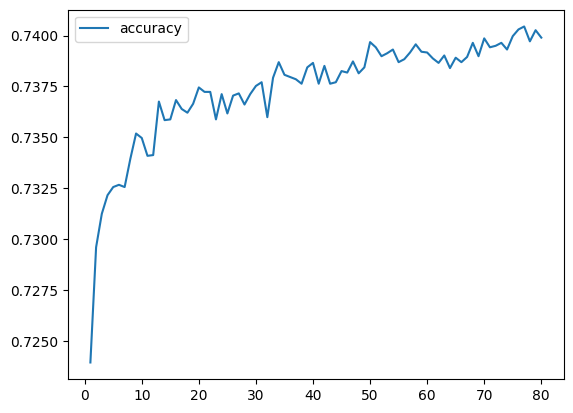

In [16]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="accuracy");

Second Attempt I shuffled the test data and added an additional hidden keras layer.  This did not improve the model. Next model I will attempt to bin additional features. 